In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sklearn
import tensorflow as tf

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The tensorflow version is {}.'.format(tf.__version__))

The scikit-learn version is 1.0.1.
The tensorflow version is 2.6.0.


In [5]:
data_df = pd.read_csv("../src/data/give_me_credit/give_me_credit_data.csv")
data_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt
0,1,0.766127,45,2,9120.0,13,0,6,0,2.0,7323.197016
1,0,0.957151,40,0,2600.0,4,0,0,0,1.0,316.878123
2,0,0.658180,38,1,3042.0,2,1,0,0,0.0,258.914887
3,0,0.233810,30,0,3300.0,5,0,0,0,0.0,118.963951
4,0,0.907239,49,1,63588.0,7,0,1,0,0.0,1584.975094
...,...,...,...,...,...,...,...,...,...,...,...
120264,0,0.385742,50,0,3400.0,7,0,0,0,0.0,1374.595707
120265,0,0.040674,74,0,2100.0,4,0,1,0,0.0,472.774869
120266,0,0.299745,44,0,5584.0,4,0,1,0,2.0,4001.283436
120267,0,0.000000,30,0,5716.0,4,0,0,0,0.0,0.000000


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = data_df.iloc[:,1:], data_df.iloc[:,0]
# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=0, penalty="none").fit(X_train, y_train)
clf.score(X_test, y_test)

/home/tyabuta/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9308223164546438

# AUC

/home/tyabuta/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/tyabuta/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


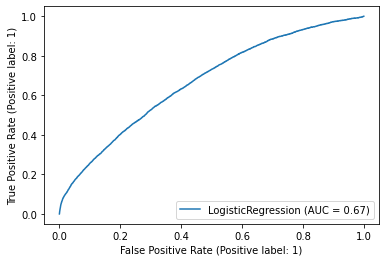

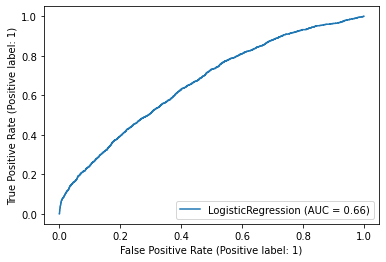

In [7]:
from sklearn import datasets, metrics, model_selection

# importance = clf.coef_[0]
# dd = dict(zip(importance, X.columns.to_list()))
# sdd = sorted(dd.keys())[::-1]
# sdd
metrics.plot_roc_curve(clf, X_train, y_train) 
metrics.plot_roc_curve(clf, X_test, y_test) 

In [8]:
# # from sklearn.metrics import RocCurveDisplay

# # logistic_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

# from sklearn import metrics

# metrics.plot_roc_curve(clf, X_train, y_train, name="Logistic Regression (train)") 
# metrics.plot_roc_curve(clf, X_test, y_test, name="Logistic Regression (test)") 
# plt.show()

# Calibration Curve

Reference: 
- https://scikit-learn.org/0.24/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve
- https://scikit-learn.org/0.24/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py

In [9]:
import tensorflow as tf
import tensorflow_probability as tfp

def computeECE(X, y):
    y_pred = clf.predict(X)
    y_train_tensor = tf.convert_to_tensor(y, dtype=tf.int64, name='labels_true')
    y_pred_tensor = tf.convert_to_tensor(y_pred, dtype=tf.int64)

    # Computing logit
    y_pred_proba = clf.predict_proba(X)
    logit_tensor = tf.convert_to_tensor(y_pred_proba, dtype=tf.float32, name='logits')
    
    return tfp.stats.expected_calibration_error(
        num_bins, logits=logit_tensor, labels_true=y_train_tensor, labels_predicted=None, name="logistic_regression"
    )

2021-11-03 14:57:02.944488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/pkgs/cudatoolkit-11.2.2-he111cf0_8/lib/:
2021-11-03 14:57:02.945136: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-03 14:57:02.945836: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2021-11-03 14:57:02.951623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(0.2313275, shape=(), dtype=float32)


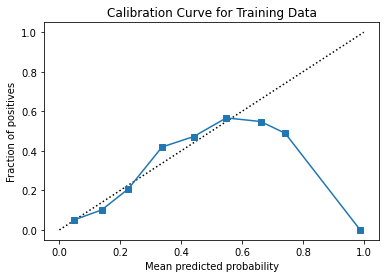

In [10]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

num_bins = 10

y_prob = clf.predict_proba(X_train)[:, 1]
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=num_bins)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()
plt.title("Calibration Curve for Training Data")
print(computeECE(X_train, y_train))

<tf.Tensor: shape=(), dtype=float32, numpy=0.23227888>

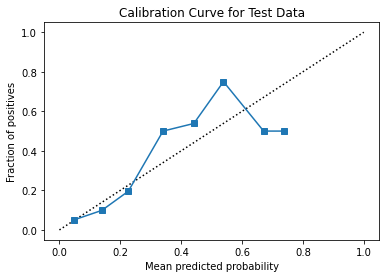

In [11]:
y_prob = clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=num_bins)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()
plt.title("Calibration Curve for Test Data")
computeECE(X_test, y_test)

In [ ]:
1*2